# **Week 4 Assignment: Centrality Measures**

**Submitted by:** Umais Siddiqui,Banu Boopalan, Euclides

**Date:** February 17, 2025

**Course:** Data Science – DATA620

**Video Link**:

# **Wikipedia API and Data Source**
Wikipedia is one of the largest and most comprehensive sources of publicly available information. The Wikipedia API provides a powerful interface to programmatically access and analyze Wikipedia content, including page links, categories, and metadata. By leveraging the Wikipedia API, researchers can extract valuable insights into the structure of knowledge and information dissemination across different domains.

The data for this analysis is sourced from Wikipedia pages using the Wikipedia API. This API allows users to fetch content, extract hyperlinks, and analyze relationships between various topics. The extracted data is then processed and structured for network analysis to identify patterns in interconnectivity and information flow.

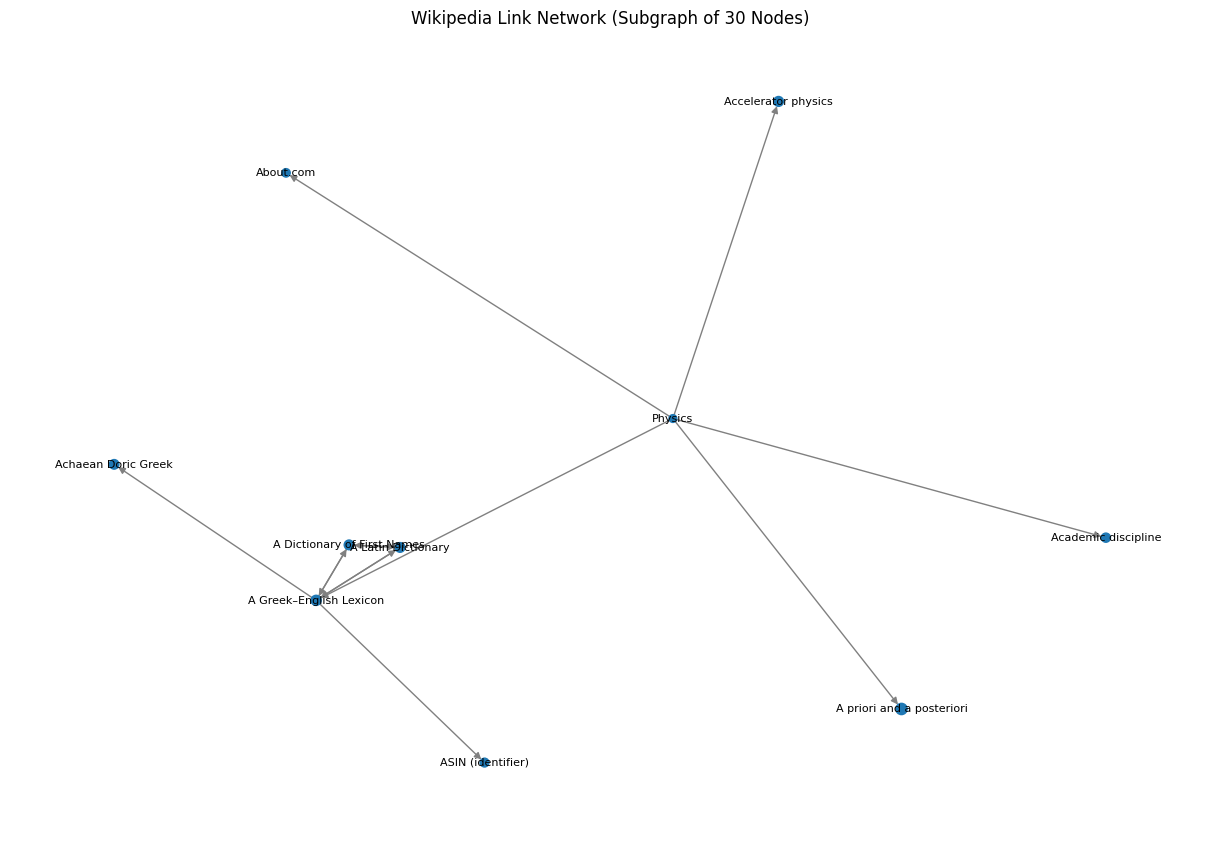

Top 10 nodes by PageRank:
A priori and a posteriori: 0.0132
A-theory of time: 0.0128
A posteriori: 0.0124
Acoustics: 0.0123
A Greek–English Lexicon: 0.0107
A. J. Ayer: 0.0106
A Treatise Concerning the Principles of Human Knowledge: 0.0106
A posteriori (disambiguation): 0.0106
Accelerator physics: 0.0101
A Dictionary of First Names: 0.0098
Graph saved as 'wikipedia_network.graphml'. You can now import it into Gephi!


In [4]:
!pip install wikipedia-api networkx matplotlib
import wikipediaapi
import networkx as nx
import matplotlib.pyplot as plt
import concurrent.futures

# Initialize Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia(user_agent="DataScienceProject/1.0 (umais20@yahoo.com)", language='en')

def get_wikipedia_links(title, depth=2, max_links=10):
    """ Recursively extract links from a Wikipedia page up to a given depth and limit links per page. """
    G = nx.DiGraph()  # Directed graph

    def add_links(page_title, current_depth):
        if current_depth > depth:
            return

        page = wiki_wiki.page(page_title)
        if not page.exists():
            return

        G.add_node(page_title, category="Wikipedia Article")

        # Limit number of links processed per page
        links = list(page.links.keys())[:max_links]

        # Use threading for concurrent fetching
        with concurrent.futures.ThreadPoolExecutor() as executor:
            futures = []
            for link_title in links:
                G.add_node(link_title, category="Wikipedia Article")
                G.add_edge(page_title, link_title)
                futures.append(executor.submit(add_links, link_title, current_depth + 1))
            # Wait for all tasks to complete
            concurrent.futures.wait(futures)

    add_links(title, 0)
    return G

# Choose a Wikipedia page
start_page = "Physics"  # Change this to any topic
network = get_wikipedia_links(start_page, depth=2, max_links=5)

# Compute centrality measures
def calculate_centrality(G):
    centrality_measures = {
        "degree_centrality": nx.degree_centrality(G),
        "betweenness_centrality": nx.betweenness_centrality(G),
        "closeness_centrality": nx.closeness_centrality(G),
        "pagerank": nx.pagerank(G),
    }

    for measure, values in centrality_measures.items():
        nx.set_node_attributes(G, values, measure)

    return centrality_measures

centrality_measures = calculate_centrality(network)

# Save the graph to GraphML format for Gephi
nx.write_graphml(network, "wikipedia_network.graphml")

# Subgraph Visualization
plt.figure(figsize=(12, 8))
subgraph = network.subgraph(list(network.nodes)[:10])  # Show first 30 nodes
pos = nx.spring_layout(subgraph)
node_sizes = [centrality_measures['pagerank'].get(node, 0) * 5000 for node in subgraph.nodes()]
nx.draw(subgraph, pos, with_labels=True, node_size=node_sizes, edge_color="gray", font_size=8)
plt.title("Wikipedia Link Network (Subgraph of 30 Nodes)")
plt.show()

# Display key centrality values for top nodes
sorted_pagerank = sorted(centrality_measures['pagerank'].items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by PageRank:")
for node, value in sorted_pagerank:
    print(f"{node}: {value:.4f}")

print("Graph saved as 'wikipedia_network.graphml'. You can now import it into Gephi!")



# **High-Level Plan for Loading and Analyzing Data**

**Data Collection:**

Utilize the Wikipedia API to extract link networks based on a chosen starting topic.

Store data in a structured format such as a graph database (e.g., NetworkX in Python) or a CSV file for additional tabular analysis.


**Data Preprocessing:**

Remove duplicate links and ensure only valid Wikipedia pages are included.

Categorize pages based on their topics (e.g., Science, Technology, History, Arts) for comparative analysis.

Compute graph properties such as degree centrality, betweenness centrality, and PageRank.

**Categorical Grouping:**

Define categorical variables based on metadata (e.g., Wikipedia categories or manually assigned labels based on page content).

Group pages into clusters based on their assigned categories.

Analysis of Degree Centrality Across Groups:

Compute degree centrality for each node (Wikipedia page) in the graph.

Compare the average degree centrality across different categorical groups.

Identify patterns in network structure, such as whether certain categories tend to be more interconnected.

**Hypothetical Outcome Prediction**

From the comparison of degree centrality across categorical groups, a possible outcome could be:

Technology-related pages may exhibit higher degree centrality, indicating that they are more frequently linked across various topics due to their broad relevance.

Niche academic topics (e.g., Philosophy or Classical Studies) may have lower degree centrality, suggesting that they are referenced mainly within specialized sub-networks.

Popular culture topics (e.g., Movies, Music, Sports) may demonstrate highly clustered networks with multiple interconnections, but lower global reach compared to scientific or technological topics.

These insights could be used to predict how different knowledge domains are structured on Wikipedia and how information dissemination varies across disciplines.